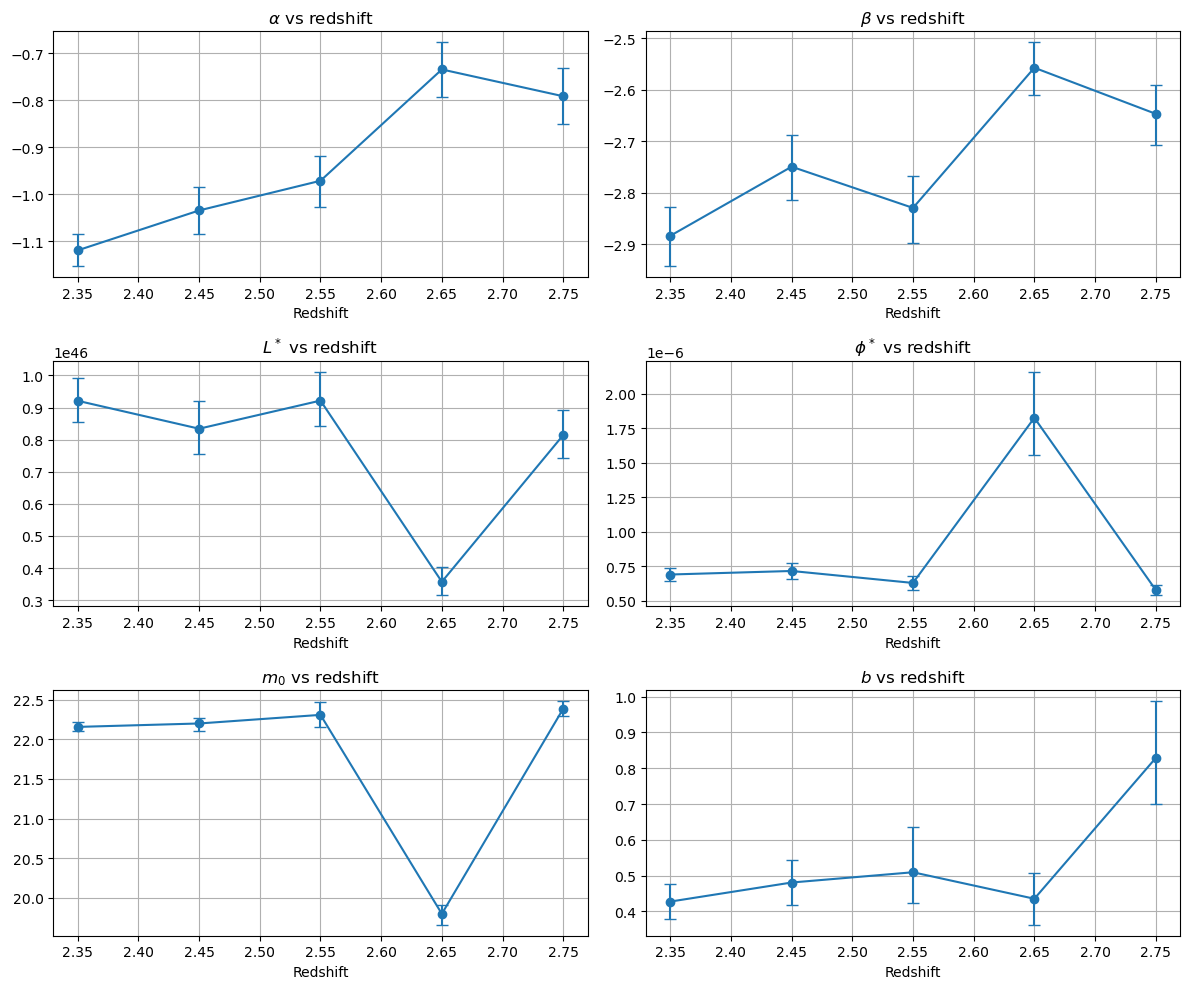

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Redshift bin centers and corresponding sample files
files_and_z = [
    ("/pscratch/sd/z/zhaozhon/MCMC/mcmc_samples1.npz", 2.35),
    ("/pscratch/sd/z/zhaozhon/MCMC/mcmc_samples2.npz", 2.45),
    ("/pscratch/sd/z/zhaozhon/MCMC/mcmc_samples3.npz", 2.55),
    ("/pscratch/sd/z/zhaozhon/MCMC/mcmc_samples4.npz", 2.65),
    ("/pscratch/sd/z/zhaozhon/MCMC/mcmc_samples5.npz", 2.75),
]

# Prepare storage
z_centers = []
alpha_vals, alpha_errs = [], []
beta_vals, beta_errs = [], []
Lstar_vals, Lstar_errs = [], []
phistar_vals, phistar_errs = [], []
m0_vals, m0_errs = [], []
b_vals, b_errs = [], []

# Loop through each file and extract medians and errors
for filename, zc in files_and_z:
    samples = np.load(f"{filename}")
    z_centers.append(zc)

    alpha_chain = samples["alpha"]
    beta_chain = samples["beta"]
    d_chain = 10 ** samples["d"]
    e_chain = 10 ** samples["e"]
    m0_chain = samples["m0"]
    b_chain = samples["b"]

    alpha_vals.append(np.median(alpha_chain))
    alpha_errs.append(np.percentile(alpha_chain, [16, 84]))
    beta_vals.append(np.median(beta_chain))
    beta_errs.append(np.percentile(beta_chain, [16, 84]))
    Lstar_vals.append(np.median(e_chain))
    Lstar_errs.append(np.percentile(e_chain, [16, 84]))
    phistar_vals.append(np.median(d_chain))
    phistar_errs.append(np.percentile(d_chain, [16, 84]))
    m0_vals.append(np.median(m0_chain))
    m0_errs.append(np.percentile(m0_chain, [16, 84]))
    b_vals.append(np.median(b_chain))
    b_errs.append(np.percentile(b_chain, [16, 84]))

# Function to compute lower and upper error bars
def get_error_bounds(errs, medians):
    lower = [m - e[0] for m, e in zip(medians, errs)]
    upper = [e[1] - m for m, e in zip(medians, errs)]
    return lower, upper

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

params = [
    (alpha_vals, alpha_errs, r"$\alpha$"),
    (beta_vals, beta_errs, r"$\beta$"),
    (Lstar_vals, Lstar_errs, r"$L^*$"),
    (phistar_vals, phistar_errs, r"$\phi^*$"),
    (m0_vals, m0_errs, r"$m_0$"),
    (b_vals, b_errs, r"$b$")
]

for i, (vals, errs, label) in enumerate(params):
    lower, upper = get_error_bounds(errs, vals)
    axs[i].errorbar(
    z_centers,
    vals,
    yerr=[lower, upper],
    fmt='o',
    capsize=4,
    linestyle='-',   # ← this connects the dots
    color='tab:blue' # optional: consistent color
)
    axs[i].set_title(f"{label} vs redshift")
    axs[i].set_xlabel("Redshift")
    axs[i].grid(True)

plt.tight_layout()
plt.show()